# **3. Go Abdul-Mageed & Ungar (2017) - WASSA Emotion Intensity Dataset**

In [ ]:
# Imports

# NLP utilities
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
# Core libraries
import numpy as np
import pandas as pd
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Sentiment analysis
from textblob import TextBlob
# Feature extraction
from sklearn.feature_extraction.text import CountVectorizer
# File handling
from google.colab import files
import glob
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
#  Uploading Files
print(" Please upload all your .txt dataset files (train/dev/test for all emotions)")
uploaded = files.upload()

 Please upload all your .txt dataset files (train/dev/test for all emotions)


Saving anger-ratings-0to1.dev.gold.txt to anger-ratings-0to1.dev.gold.txt
Saving anger-ratings-0to1.test.target.txt to anger-ratings-0to1.test.target.txt
Saving anger-ratings-0to1.train.txt to anger-ratings-0to1.train.txt
Saving fear-ratings-0to1.dev.gold.txt to fear-ratings-0to1.dev.gold.txt
Saving fear-ratings-0to1.test.gold.txt to fear-ratings-0to1.test.gold.txt
Saving fear-ratings-0to1.train.txt to fear-ratings-0to1.train.txt
Saving joy-ratings-0to1.dev.gold.txt to joy-ratings-0to1.dev.gold.txt
Saving joy-ratings-0to1.test.gold.txt to joy-ratings-0to1.test.gold.txt
Saving joy-ratings-0to1.train.txt to joy-ratings-0to1.train.txt
Saving sadness-ratings-0to1.dev.gold.txt to sadness-ratings-0to1.dev.gold.txt
Saving sadness-ratings-0to1.test.gold.txt to sadness-ratings-0to1.test.gold.txt
Saving sadness-ratings-0to1.train.txt to sadness-ratings-0to1.train.txt


In [ ]:
#loading datasets

def load_emotion_dataset():
    """
    Loads all emotion .txt files in the directory and combines them
    into a single DataFrame.
    """
    dfs = []

    for filepath in glob.glob("*.txt"):
        # Extracting emotion from filename
        emotion = filepath.split('-')[0]

        # Reading file (third column ignored)
        df = pd.read_csv(
            filepath,
            sep='\t',
            header=None,
            names=['tweet', 'file_emotion', 'intensity'],
            quoting=3,
            engine='python',
            on_bad_lines='skip'
        )

        # Assigning correct emotion based on filename
        df['emotion'] = emotion

        # Keeping only tweet & emotion
        dfs.append(df[['tweet', 'emotion']])
    # Merging all emotions into one DataFrame
    return pd.concat(dfs, ignore_index=True)

df = load_emotion_dataset()

print(df.head())
print(df.tail())
print(df.columns)

                                               tweet emotion
0  #Matthew 25; 1-13\nCould somebody shoot a #vid...    fear
1  @bkero @whispersystems Which really sucks beca...    fear
2  Be #afraid of the #quiet ones they are the one...    fear
3  @riinkanei he's a horrible person and now i ga...    fear
4  What we fear doing most is usually what we mos...    fear
                                                  tweet  emotion
7097  Common app just randomly logged me out as I wa...  sadness
7098  I'd rather laugh with the rarest genius, in be...  sadness
7099  If you #invest in my new #film I will stop ask...  sadness
7100  Just watched Django Unchained, Other people ma...  sadness
7101  @KeithOlbermann depressing how despicable Trum...  sadness
Index(['tweet', 'emotion'], dtype='object')


In [ ]:
# Removing empty tweets
df.dropna(subset=['tweet', 'emotion'], inplace=True)

# Converting tweets to string
df['tweet'] = df['tweet'].astype(str)

# checking
print(df.isnull().sum())

tweet      0
emotion    0
dtype: int64


In [ ]:
#Preprocessing
def preprocess(text_series):
    """
    Performs standard tweet cleaning while preserving emojis
    """

    # Lowercasing
    text_series = text_series.str.lower()

    # removing HTML
    text_series = text_series.str.replace("(<br/>)", "", regex=True)
    text_series = text_series.str.replace('(<a).*(>).*(</a>)', '', regex=True)

    # replacing HTML encoded symbols
    text_series = text_series.str.replace('(&amp)', '&', regex=True)
    text_series = text_series.str.replace('(&gt)', '>', regex=True)
    text_series = text_series.str.replace('(&lt)', '<', regex=True)
    text_series = text_series.str.replace('(\xa0)', ' ', regex=True)

    # removing URLs, mentions, hashtags
    text_series = text_series.str.replace(r"http\S+|www.\S+", "", regex=True)
    text_series = text_series.str.replace(r"@\w+", "", regex=True)
    text_series = text_series.str.replace(r"#", "", regex=True)

    # keeping emojis
    text_series = text_series.str.replace(r"[^\w\s" + "\U0001F600-\U0001F64F" + "]", "", regex=True)

    text_series = text_series.str.strip()

    return text_series

df['tweet'] = preprocess(df['tweet'])

In [ ]:
# Feature Engineering
# Sentiment-based features
df['polarity'] = df['tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['tweet'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Length-based features
df['word_count'] = df['tweet'].apply(lambda x: len(str(x).split()))
df['char_count'] = df['tweet'].apply(lambda x: len(str(x)))
df['word_count'] = df['tweet'].apply(lambda x: len(str(x).split()))
df['char_count'] = df['tweet'].apply(lambda x: len(str(x)))

print("Descriptive Statistics:")
print(df[['word_count', 'char_count']].describe())

Descriptive Statistics:
        word_count   char_count
count  7102.000000  7102.000000
mean     15.250352    82.827936
std       6.595489    34.657761
min       1.000000     4.000000
25%      10.000000    54.000000
50%      16.000000    87.000000
75%      21.000000   114.000000
max      33.000000   140.000000


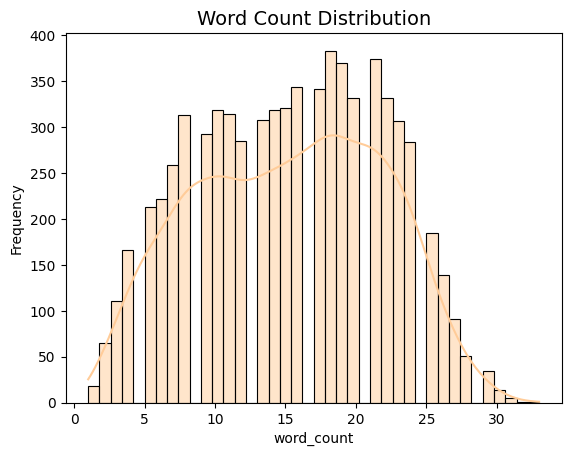

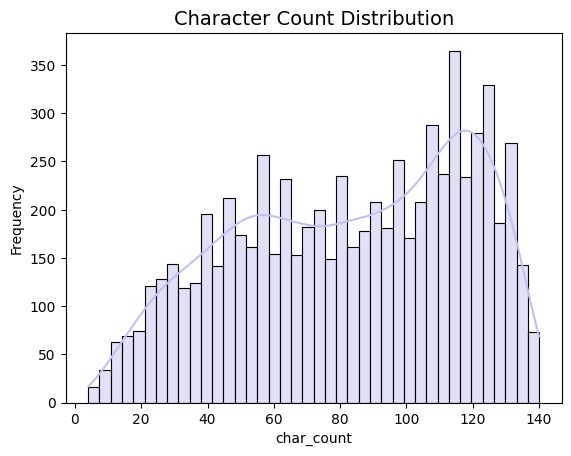

In [ ]:
# Word Count Distribution & Character Count Distribution
features = ['word_count', 'char_count']
titles = ['Word Count Distribution', 'Character Count Distribution']
colors = ['#ffcc99', '#c2c2f0']

for feature, title, color in zip(features, titles, colors):
    sns.histplot(df[feature], bins=40, color=color, kde=True)
    plt.title(title, fontsize=14)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

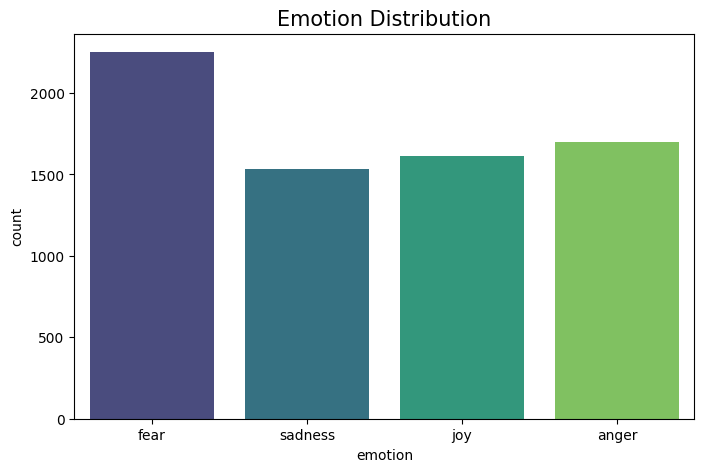

In [ ]:
# Emotion label distribution
plt.figure(figsize=(8,5))
sns.countplot(x='emotion', data=df, palette='viridis')
plt.title('Emotion Distribution', fontsize=15)
plt.show()

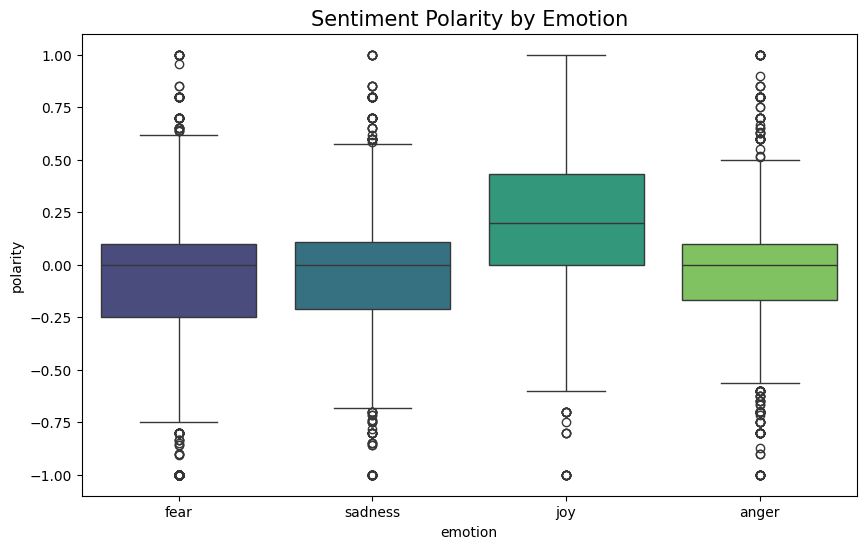

In [ ]:
# Polarity by Emotion
plt.figure(figsize=(10,6))
sns.boxplot(x='emotion', y='polarity', data=df, palette='viridis')
plt.title('Sentiment Polarity by Emotion', size=15)
plt.show()

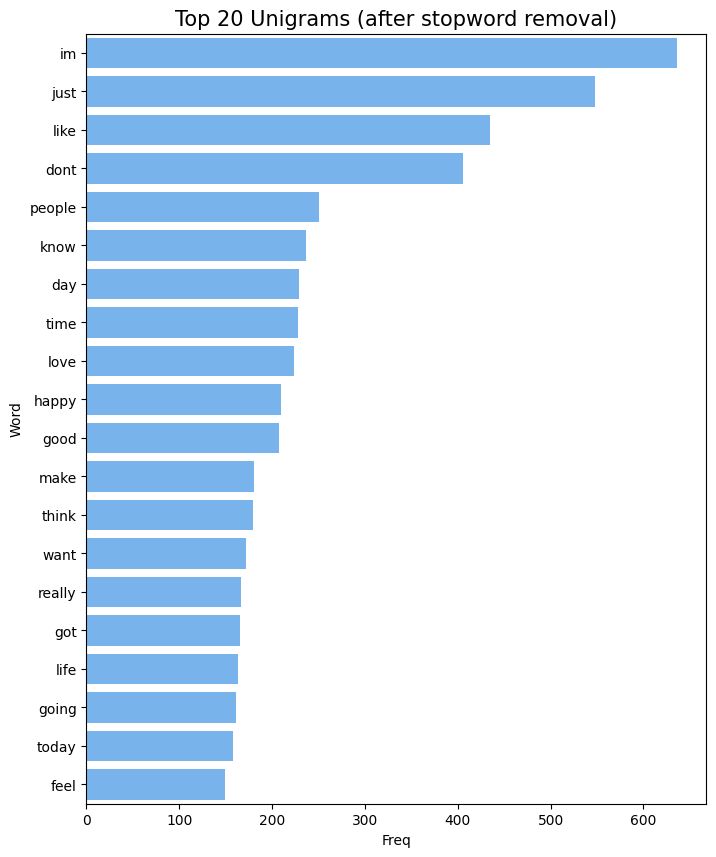

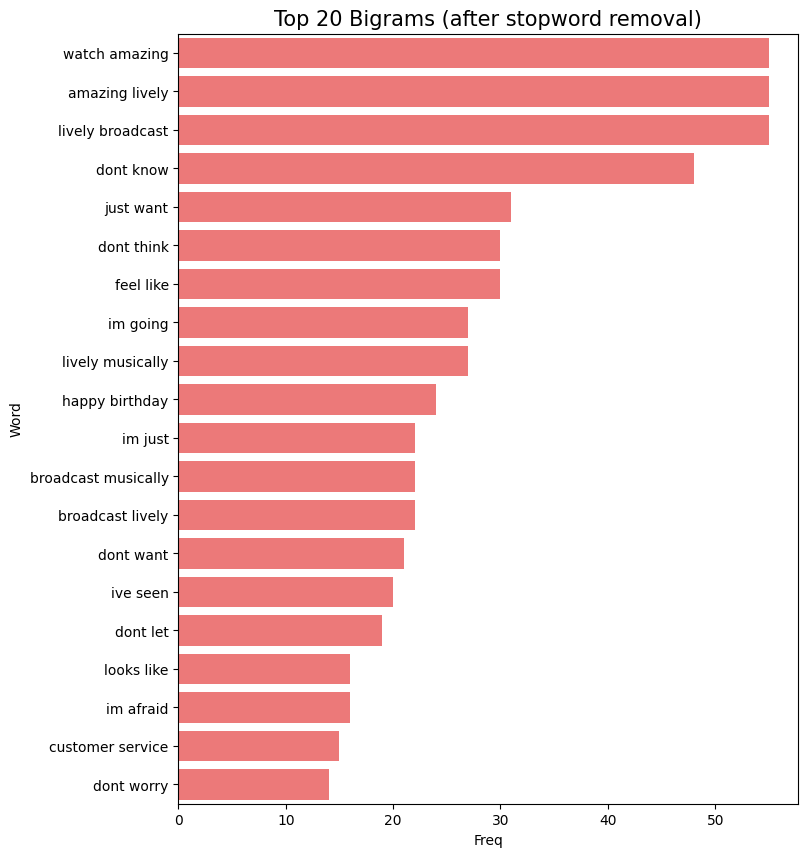

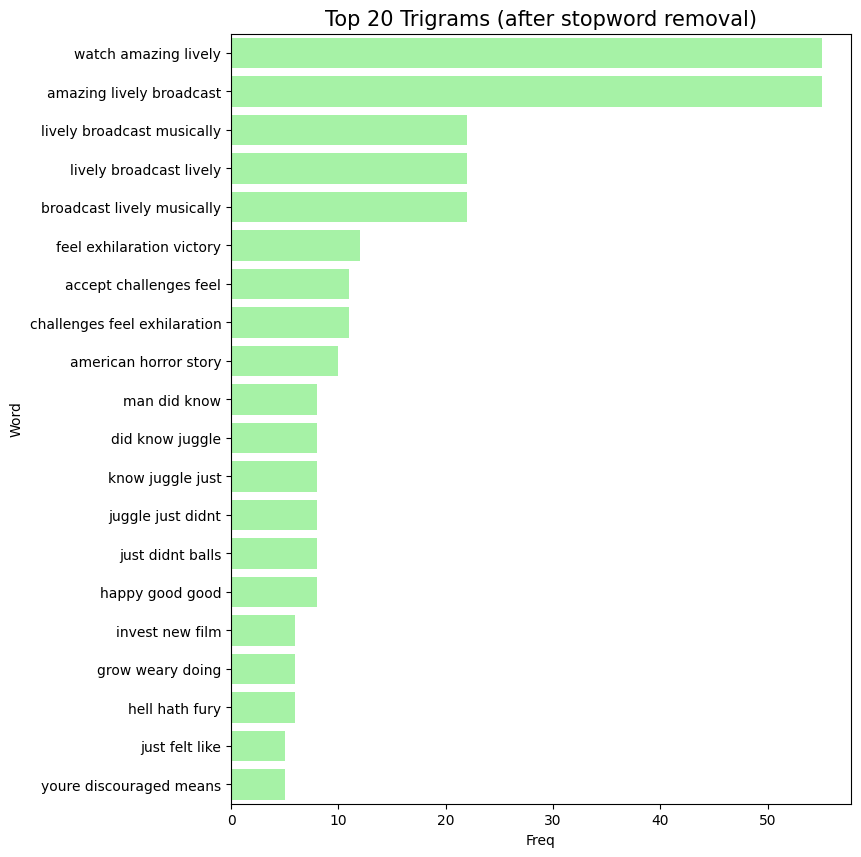

In [ ]:
# Word Frequency (N-grams)
def get_top_ngrams(corpus, ngram_range=(1,1), stop_words='english', n=20):
    """
    Extracts top-N most frequent n-grams from corpus.
    """
    vec = CountVectorizer(stop_words=stop_words, ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    df_words = pd.DataFrame(words_freq[:n], columns=['Word', 'Freq'])
    return df_words

stop_words = 'english'
n = 20
unigrams = get_top_ngrams(df['tweet'], (1, 1), stop_words, n)
bigrams = get_top_ngrams(df['tweet'], (2, 2), stop_words, n)
trigrams = get_top_ngrams(df['tweet'], (3, 3), stop_words, n)

plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', data=unigrams, color='#66b3ff')
plt.title('Top 20 Unigrams (after stopword removal)', size=15)
plt.show()

plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', data=bigrams, color='#ff6666')
plt.title('Top 20 Bigrams (after stopword removal)', size=15)
plt.show()

plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', data=trigrams, color='#99ff99')
plt.title('Top 20 Trigrams (after stopword removal)', size=15)
plt.show()

In [ ]:
df['emotion'].value_counts()

,count
emotion,
fear,2252
anger,1701
joy,1616
sadness,1533


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


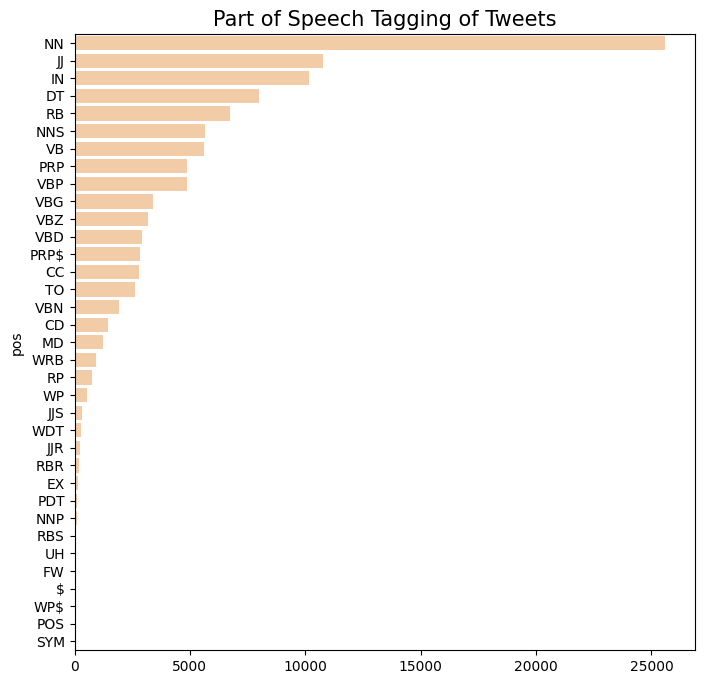

In [ ]:
# Part of Speech Tagging of Tweets
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

all_tags = []
for tweet in df['tweet']:
    if tweet.strip():
        tokens = nltk.word_tokenize(tweet)
        tags = nltk.pos_tag(tokens)
        all_tags.extend(tags)

import pandas as pd
pos_df = pd.DataFrame(all_tags, columns=['word', 'pos'])
top_pos = pos_df['pos'].value_counts()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))
sns.barplot(y=top_pos.index, x=top_pos.values, color='#ffcc99')
plt.title('Part of Speech Tagging of Tweets', size=15)
plt.show()

In [ ]:
# Training & test split
from sklearn.model_selection import train_test_split

X = df['tweet']
y = df['emotion']

# split preserves emotion proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training size:", len(X_train))
print("Test size:", len(X_test))

Training size: 5681
Test size: 1421


In [ ]:
df['emotion'].value_counts(normalize=True)

,proportion
emotion,
fear,0.317094
anger,0.239510
joy,0.227542
sadness,0.215855


In [ ]:
# Baseline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Majority-class baseline
baseline_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer()), # Text into TF-IDF features
    ("clf", DummyClassifier(strategy='most_frequent')) # "most_frequent" = always predict the most common emotion
])

# Fitting baseline on training data
baseline_pipeline.fit(X_train, y_train)

# Predicting on test data
pred = baseline_pipeline.predict(X_test)

# baseline performance summary
print(" BASELINE PIPELINE ")
print("Accuracy:", accuracy_score(y_test, pred))
print("F1_macro:", f1_score(y_test, pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, pred))

 BASELINE PIPELINE 
Accuracy: 0.31738212526389864
F1_macro: 0.12045940170940171

Classification Report:
               precision    recall  f1-score   support

       anger       0.00      0.00      0.00       340
        fear       0.32      1.00      0.48       451
         joy       0.00      0.00      0.00       323
     sadness       0.00      0.00      0.00       307

    accuracy                           0.32      1421
   macro avg       0.08      0.25      0.12      1421
weighted avg       0.10      0.32      0.15      1421



In [ ]:
# CLASSIFIER COMPARISON
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.pipeline import Pipeline

models = {
    "LogisticRegression": LogisticRegression(max_iter=2000),
    "LinearSVC": LinearSVC()
}

print("CLASSIFIER COMPARISON")

# Train and evaluate each classifier
for name, model in models.items():
    print(f"\nTraining {name}...\n")

    pipe = Pipeline([
        ("tfidf", TfidfVectorizer()),
        ("clf", model)
    ])
    # Fitting the model on the training data
    pipe.fit(X_train, y_train)
    # Predicting emotions on the test data
    preds = pipe.predict(X_test)

    # Displaying precision, recall, and F1-score for each emotion
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, preds))

CLASSIFIER COMPARISON

Training LogisticRegression...


LogisticRegression Classification Report:
              precision    recall  f1-score   support

       anger       0.89      0.83      0.86       340
        fear       0.82      0.94      0.88       451
         joy       0.94      0.88      0.91       323
     sadness       0.84      0.79      0.82       307

    accuracy                           0.87      1421
   macro avg       0.87      0.86      0.87      1421
weighted avg       0.87      0.87      0.87      1421


Training LinearSVC...


LinearSVC Classification Report:
              precision    recall  f1-score   support

       anger       0.91      0.89      0.90       340
        fear       0.89      0.93      0.91       451
         joy       0.97      0.93      0.95       323
     sadness       0.83      0.84      0.84       307

    accuracy                           0.90      1421
   macro avg       0.90      0.90      0.90      1421
weighted avg       0.90      

In [ ]:
#  HYPERPARAMETER OPTIMIZATION (LogReg + LinearSVC)

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

print(" HYPERPARAMETER OPTIMIZATION")

# Defining Pipelines

pipe_logreg = Pipeline([
    ("tfidf", TfidfVectorizer()), # Text to TF-IDF features
    ("clf", LogisticRegression(max_iter=3000)) # Logistic Regression classifier
])

pipe_svm = Pipeline([
    ("tfidf", TfidfVectorizer()), # Text to TF-IDF features
    ("clf", LinearSVC()) # Linear Support Vector Classifier
])

# Hyperparameter Search Spaces

# TF-IDF parameters:
# - min_df: ignore rare words appearing in fewer documents
# - ngram_range: use unigrams or unigrams + bigrams
# - sublinear_tf: apply log-scaling to term frequencies

# Classifier parameters:
# - C: regularization strength (smaller = stronger regularization)

logreg_params = {
    "tfidf__min_df": [1, 2, 3, 5],
    "tfidf__ngram_range": [(1,1), (1,2)],
    "tfidf__sublinear_tf": [True, False],
    # Logistic Regression specific
    "clf__C": uniform(0.1, 10),
    "clf__penalty": ["l2"], # L2 regularization
    "clf__solver": ["lbfgs", "liblinear"], # Solvers supporting L2
}

svm_params = {
    "tfidf__min_df": [1, 2, 3, 5],
    "tfidf__ngram_range": [(1,1), (1,2)],
    "tfidf__sublinear_tf": [True, False],
    # Linear SVC specific
    "clf__C": uniform(0.1, 10)
}

# Running RandomizedSearchCV

logreg_search = RandomizedSearchCV(
    pipe_logreg,
    logreg_params,
    n_iter=20, # Number of random configurations
    scoring="f1_macro", # Evaluation metric
    cv=3, # Cross-validation folds
    verbose=2, # Show training progress
    random_state=42,
    n_jobs=-1
)

svm_search = RandomizedSearchCV(
    pipe_svm,
    svm_params,
    n_iter=20,
    scoring="f1_macro",
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

print("\nRunning HPO for LogisticRegression...\n")
logreg_search.fit(X_train, y_train)

print("\nRunning HPO for LinearSVC...\n")
svm_search.fit(X_train, y_train)

# Evaluating best models

best_logreg = logreg_search.best_estimator_
best_svm = svm_search.best_estimator_

# Logistic Regression results
print("BEST LOGISTIC REGRESSION MODEL ")
print(logreg_search.best_params_)
pred_logreg = best_logreg.predict(X_test)
print(classification_report(y_test, pred_logreg))

# Linear SVC results
print(" BEST LINEAR SVC MODEL ")
print(svm_search.best_params_)
pred_svm = best_svm.predict(X_test)
print(classification_report(y_test, pred_svm))

# Store HPO models for further analysis
all_model_pipelines = {
    "HPO_LogisticRegression": best_logreg,
    "HPO_LinearSVC": best_svm
}

print("\nHPO COMPLETE. Models stored in all_model_pipelines.\n")


 HYPERPARAMETER OPTIMIZATION

Running HPO for LogisticRegression...

Fitting 3 folds for each of 20 candidates, totalling 60 fits

Running HPO for LinearSVC...

Fitting 3 folds for each of 20 candidates, totalling 60 fits
BEST LOGISTIC REGRESSION MODEL 
{'clf__C': np.float64(5.242344384136116), 'clf__penalty': 'l2', 'clf__solver': 'liblinear', 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 1), 'tfidf__sublinear_tf': True}
              precision    recall  f1-score   support

       anger       0.91      0.86      0.88       340
        fear       0.87      0.93      0.90       451
         joy       0.95      0.92      0.93       323
     sadness       0.83      0.83      0.83       307

    accuracy                           0.89      1421
   macro avg       0.89      0.88      0.89      1421
weighted avg       0.89      0.89      0.89      1421

 BEST LINEAR SVC MODEL 
{'clf__C': np.float64(3.845401188473625), 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 1), 'tfidf__sublinear_tf': T

In [ ]:
all_model_pipelines = {
    "Baseline Dummy": baseline_pipeline,
    "HPO LogisticRegression": best_logreg,
    "HPO LinearSVC": best_svm
}

all_predictions = {name: model.predict(X_test) for name, model in all_model_pipelines.items()}

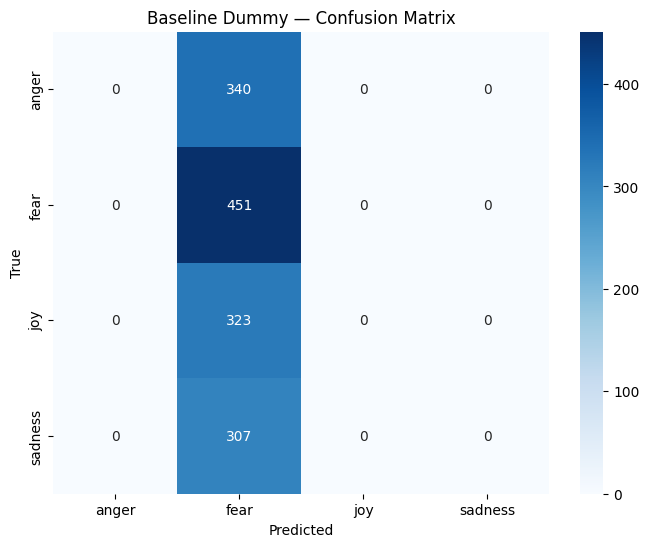

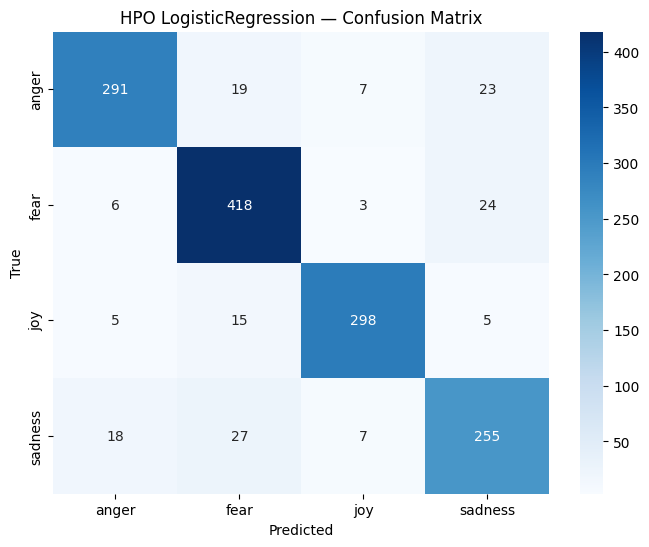

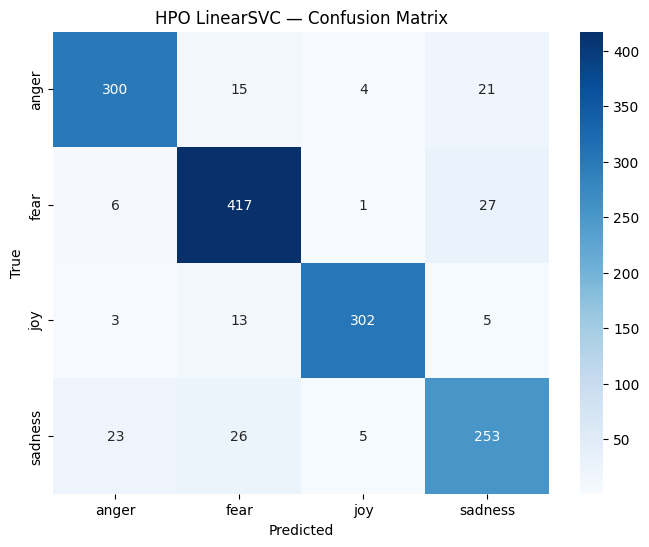


 MOST CONFUSED EMOTION PAIRS — Baseline Dummy 
True='anger' → Predicted='fear' : 340
True='joy' → Predicted='fear' : 323
True='sadness' → Predicted='fear' : 307

 MOST CONFUSED EMOTION PAIRS — HPO LogisticRegression 
True='sadness' → Predicted='fear' : 27
True='fear' → Predicted='sadness' : 24
True='anger' → Predicted='sadness' : 23
True='anger' → Predicted='fear' : 19
True='sadness' → Predicted='anger' : 18
True='joy' → Predicted='fear' : 15
True='anger' → Predicted='joy' : 7
True='sadness' → Predicted='joy' : 7
True='fear' → Predicted='anger' : 6
True='joy' → Predicted='anger' : 5

 MOST CONFUSED EMOTION PAIRS — HPO LinearSVC 
True='fear' → Predicted='sadness' : 27
True='sadness' → Predicted='fear' : 26
True='sadness' → Predicted='anger' : 23
True='anger' → Predicted='sadness' : 21
True='anger' → Predicted='fear' : 15
True='joy' → Predicted='fear' : 13
True='fear' → Predicted='anger' : 6
True='joy' → Predicted='sadness' : 5
True='sadness' → Predicted='joy' : 5
True='anger' → Predict

,emotion,precision,recall,f1,support
0,anger,0.000000,0.0,0.000000,340
2,joy,0.000000,0.0,0.000000,323
3,sadness,0.000000,0.0,0.000000,307
1,fear,0.317382,1.0,0.481838,451



 PER-CLASS METRICS — HPO LogisticRegression 


,emotion,precision,recall,f1,support
3,sadness,0.830619,0.830619,0.830619,307
0,anger,0.909375,0.855882,0.881818,340
1,fear,0.872651,0.926829,0.898925,451
2,joy,0.946032,0.922601,0.934169,323



 PER-CLASS METRICS — HPO LinearSVC 


,emotion,precision,recall,f1,support
3,sadness,0.826797,0.824104,0.825449,307
0,anger,0.903614,0.882353,0.892857,340
1,fear,0.885350,0.924612,0.904555,451
2,joy,0.967949,0.934985,0.951181,323



 ERROR TABLE — Baseline Dummy 
Total misclassified samples: 970 / 1421


,index,text,true,pred
0,0,a good thing about being sick is that coughing...,joy,fear
1,1,mhchat childhood experiences inform adult rela...,sadness,fear
2,3,why doesnt this account follow me,anger,fear
3,6,gotta wonder why caller max listens to the sho...,anger,fear
4,7,ppl like that irritate my soul,anger,fear
5,8,extreme sadness,sadness,fear
6,10,howling with laughter at well done bezza bakeo...,joy,fear
7,11,why doesnt anybody i know watch penny dreadful,sadness,fear
8,12,while i was walking a little boy in a red shir...,joy,fear
9,13,papercuts sting and stub ur toe last for like ...,anger,fear



 ERROR TABLE — HPO LogisticRegression 
Total misclassified samples: 159 / 1421


,index,text,true,pred
0,11,why doesnt anybody i know watch penny dreadful,sadness,fear
1,21,lmao this person must hate me so bad to talk s...,fear,anger
2,34,quite simply the worst airline worstairline iv...,sadness,fear
3,38,lmao i can only imagine the frown across that ...,sadness,anger
4,51,shoutout to the drunk man on the bus who pisse...,sadness,anger
5,68,coincidentally watched ulzanas raid last night...,anger,fear
6,73,dont be offendednim just doing something thatn...,anger,fear
7,88,take me with you jk have fun relax get a massa...,anger,sadness
8,92,im throwing myself straight into american horr...,sadness,fear
9,100,migraine hangover all day stood up to do dishe...,fear,sadness



 ERROR TABLE — HPO LinearSVC 
Total misclassified samples: 149 / 1421


,index,text,true,pred
0,11,why doesnt anybody i know watch penny dreadful,sadness,fear
1,21,lmao this person must hate me so bad to talk s...,fear,anger
2,34,quite simply the worst airline worstairline iv...,sadness,fear
3,38,lmao i can only imagine the frown across that ...,sadness,anger
4,51,shoutout to the drunk man on the bus who pisse...,sadness,anger
5,73,dont be offendednim just doing something thatn...,anger,fear
6,88,take me with you jk have fun relax get a massa...,anger,sadness
7,92,im throwing myself straight into american horr...,sadness,fear
8,100,migraine hangover all day stood up to do dishe...,fear,sadness
9,116,thanks,fear,joy



 FINAL PERFORMANCE SUMMARY 


,Model,F1-Micro,F1-Macro
0,HPO LinearSVC,0.895144,0.893511
1,HPO LogisticRegression,0.888107,0.886383
2,Baseline Dummy,0.317382,0.120459


In [ ]:
# ADVANCED ERROR ANALYSIS

# imports
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Recreating and refiting the baseline pipeline
# Ensuring baseline is wrapped in TF-IDF pipeline
baseline_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", DummyClassifier(strategy='most_frequent'))
])
baseline_pipeline.fit(X_train, y_train)

# Collecting all pipelines
all_model_pipelines = {
    "Baseline Dummy": baseline_pipeline,
    "HPO LogisticRegression": best_logreg,
    "HPO LinearSVC": best_svm
}

# Generating predictions
all_predictions = {name: model.predict(X_test) for name, model in all_model_pipelines.items()}

# Defining emotion labels
emotion_labels = sorted(df['emotion'].unique())

# PER CLASS CONFUSION MATRICES
def plot_confusion_per_class(model_name):
    """
    Plots a confusion matrix for a given model.
    Rows = true labels
    Columns = predicted labels
    """
    y_pred = all_predictions[model_name]
    cm = confusion_matrix(y_test, y_pred, labels=emotion_labels)

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=emotion_labels, yticklabels=emotion_labels)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"{model_name} — Confusion Matrix")
    plt.show()

# Plotting confusion matrices
for model_name in all_model_pipelines:
    plot_confusion_per_class(model_name)

#  MOST CONFUSED EMOTION PAIRS
def most_confused_pairs(model_name, top_n=10):
    """
    Identifies emotion pairs that are most frequently confused
    """
    y_pred = all_predictions[model_name]

    cm = confusion_matrix(y_test, y_pred, labels=emotion_labels)
    # Removing correct predictions
    cm_off_diag = cm.copy()
    np.fill_diagonal(cm_off_diag, 0)

    pairs = []
    for i, true_em in enumerate(emotion_labels):
        for j, pred_em in enumerate(emotion_labels):
            if i != j and cm_off_diag[i,j] > 0:
                pairs.append(((true_em, pred_em), cm_off_diag[i,j]))

    # Sortting by frequency of confusion
    pairs = sorted(pairs, key=lambda x: x[1], reverse=True)

    print(f"\n MOST CONFUSED EMOTION PAIRS — {model_name} ")
    for (true_em, pred_em), count in pairs[:top_n]:
        print(f"True='{true_em}' → Predicted='{pred_em}' : {count}")

# Displaying confused pairs for each model
for model_name in all_model_pipelines:
    most_confused_pairs(model_name)

#  PER-CLASS METRICS

def per_class_metrics(model_name):
    """
    Computes precision, recall, F1-score, and support
    for each emotion class.
    """
    y_pred = all_predictions[model_name]

    p, r, f, s = precision_recall_fscore_support(y_test, y_pred, labels=emotion_labels, zero_division=0)
    df_metrics = pd.DataFrame({
        "emotion": emotion_labels,
        "precision": p,
        "recall": r,
        "f1": f,
        "support": s
    }).sort_values("f1")
    print(f"\n PER-CLASS METRICS — {model_name} ")
    display(df_metrics)
    return df_metrics

# Storing metrics for all models
all_per_class_metrics = {name: per_class_metrics(name) for name in all_model_pipelines}

#   ROW-LEVEL MISCLASSIFICATIONS

def build_error_table(model_name):
    """
    Builds a table of individual misclassified samples
    """
    y_pred = all_predictions[model_name]
    errors = []

    for i, (true_label, pred_label) in enumerate(zip(y_test, y_pred)):
        if true_label != pred_label:
            errors.append({
                "index": i,
                "text": X_test.iloc[i],
                "true": true_label,
                "pred": pred_label
            })

    df_errors = pd.DataFrame(errors).sort_values("index")
    print(f"\n ERROR TABLE — {model_name} ")
    print(f"Total misclassified samples: {len(df_errors)} / {len(y_test)}")
    display(df_errors.head(20))
    return df_errors

# Build error tables for all models
all_error_tables = {name: build_error_table(name) for name in all_model_pipelines}

#  INTERACTIVE ERROR INSPECTION

def inspect_errors(model_name, true_emotion=None, pred_emotion=None, n=5):
    """
    Allows manual inspection of specific error types
    """
    df_err = all_error_tables[model_name]
    if true_emotion:
        df_err = df_err[df_err["true"] == true_emotion]
    if pred_emotion:
        df_err = df_err[df_err["pred"] == pred_emotion]
    print(f"\nShowing top {n} errors for model='{model_name}' | true='{true_emotion}' | pred='{pred_emotion}'")
    display(df_err.head(n))
    return df_err.head(n)

#   SUMMARY
summary_df = pd.DataFrame([
    [name, f1_score(y_test, all_predictions[name], average="micro"),
     f1_score(y_test, all_predictions[name], average="macro")]
    for name in all_model_pipelines
], columns=["Model", "F1-Micro", "F1-Macro"])

print("\n FINAL PERFORMANCE SUMMARY ")
display(summary_df.sort_values("F1-Micro", ascending=False).reset_index(drop=True))


In [ ]:
!pip install transformers datasets torch --quiet

In [ ]:
# BERT TRANSFORMER MODEL

# BERT requires numeric labels so need to encode emotion strings as integers
from sklearn.preprocessing import LabelEncoder

print(" BERT TRANSFORMER MODEL ")

# Encoding
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

num_labels = len(label_encoder.classes_) # Number of emotion classes

print("Emotion labels:", label_encoder.classes_)

 BERT TRANSFORMER MODEL 
Emotion labels: ['anger' 'fear' 'joy' 'sadness']


In [ ]:
from transformers import BertTokenizerFast, BertForSequenceClassification

model_name = "bert-base-uncased" # pre trained BERT model

# Tokenizer converts text into tokens
tokenizer = BertTokenizerFast.from_pretrained(model_name)

# Loading BERT with a classification head
bert_model = BertForSequenceClassification.from_pretrained(
    model_name,
    num_labels=num_labels
)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Tokenizing
def tokenize(texts):
    return tokenizer(
        texts.tolist(),
        padding=True,
        truncation=True,
        max_length=128,
        return_tensors="pt"
    )

# Tokenize train and test data
X_train_tok = tokenize(X_train)
X_test_tok = tokenize(X_test)

import torch

# Convert encoded labels into PyTorch tensors
y_train_tensor = torch.tensor(y_train_enc)
y_test_tensor = torch.tensor(y_test_enc)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

# Training dataset
train_dataset = TensorDataset(
    X_train_tok['input_ids'],
    X_train_tok['attention_mask'],
    y_train_tensor
)

# Test dataset
test_dataset = TensorDataset(
    X_test_tok['input_ids'],
    X_test_tok['attention_mask'],
    y_test_tensor
)
# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
from torch.optim import AdamW
from tqdm import tqdm

# Use GPU if not CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model.to(device)

optimizer = AdamW(bert_model.parameters(), lr=2e-5) # AdamW optimizer
epochs = 3 # Number of fine-tuning epochs

# Set model to training
bert_model.train()

for epoch in range(epochs):
    total_loss = 0

    # Progress bar
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}")

    for batch in progress_bar:
        input_ids, attention_mask, labels = [b.to(device) for b in batch]

        optimizer.zero_grad()

        outputs = bert_model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )

        loss = outputs.loss # Compute loss
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        progress_bar.set_postfix(loss=loss.item())

    print(f"Epoch {epoch+1} average loss: {total_loss/len(train_loader):.4f}")

Epoch 1: 100%|██████████| 356/356 [50:46<00:00,  8.56s/it, loss=0.0629]


Epoch 1 average loss: 0.8699


Epoch 2: 100%|██████████| 356/356 [49:10<00:00,  8.29s/it, loss=0.028]


Epoch 2 average loss: 0.3363


Epoch 3: 100%|██████████| 356/356 [49:11<00:00,  8.29s/it, loss=0.0421]

Epoch 3 average loss: 0.2190


In [ ]:
from sklearn.metrics import classification_report, f1_score, accuracy_score

bert_model.eval()

all_preds = []
all_true = []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = [b.to(device) for b in batch]

        outputs = bert_model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_true.extend(labels.cpu().numpy())

print("\nBERT RESULTS ")
print("Accuracy:", accuracy_score(all_true, all_preds))
print("Macro F1:", f1_score(all_true, all_preds, average="macro"))

print("\nClassification Report:")
print(classification_report(
    all_true,
    all_preds,
    target_names=label_encoder.classes_
))



BERT RESULTS 
Accuracy: 0.8838845883180858
Macro F1: 0.8832215233241665

Classification Report:
              precision    recall  f1-score   support

       anger       0.92      0.85      0.89       340
        fear       0.88      0.88      0.88       451
         joy       0.90      0.95      0.92       323
     sadness       0.83      0.85      0.84       307

    accuracy                           0.88      1421
   macro avg       0.88      0.88      0.88      1421
weighted avg       0.88      0.88      0.88      1421

